# Transforming Data with dplyr

The verbs you can use to transform your data, including select, filter, arrange, and mutate. we'll use these functions to modify the counties dataset to view particular observations and answer questions about the data.

## The Counties Dataset

### Understanding your data

### Libraries

In [43]:
library(dplyr)
library(ggplot2)

In [4]:
counties <- readRDS(gzcon(url("https://assets.datacamp.com/production/repositories/4984/datasets/a924bf7063f02a5445e1f49cc1c75c78e018ac4c/counties.rds")))
head(counties)

census_id,state,county,region,metro,population,men,women,hispanic,white,...,other_transp,work_at_home,mean_commute,employed,private_work,public_work,self_employed,family_work,unemployment,land_area
1001,Alabama,Autauga,South,Metro,55221,26745,28476,2.6,75.8,...,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6,594.44
1003,Alabama,Baldwin,South,Metro,195121,95314,99807,4.5,83.1,...,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5,1589.78
1005,Alabama,Barbour,South,Nonmetro,26932,14497,12435,4.6,46.2,...,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6,884.88
1007,Alabama,Bibb,South,Metro,22604,12073,10531,2.2,74.5,...,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3,622.58
1009,Alabama,Blount,South,Metro,57710,28512,29198,8.6,87.9,...,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7,644.78
1011,Alabama,Bullock,South,Nonmetro,10678,5660,5018,4.4,22.2,...,1.7,2.8,27.5,3865,79.5,15.1,5.4,0.0,18.0,622.81


In [5]:
glimpse(counties)

Rows: 3,138
Columns: 40
$ census_id          <chr> "1001", "1003", "1005", "1007", "1009", "1011", ...
$ state              <chr> "Alabama", "Alabama", "Alabama", "Alabama", "Ala...
$ county             <chr> "Autauga", "Baldwin", "Barbour", "Bibb", "Blount...
$ region             <chr> "South", "South", "South", "South", "South", "So...
$ metro              <chr> "Metro", "Metro", "Nonmetro", "Metro", "Metro", ...
$ population         <dbl> 55221, 195121, 26932, 22604, 57710, 10678, 20354...
$ men                <dbl> 26745, 95314, 14497, 12073, 28512, 5660, 9502, 5...
$ women              <dbl> 28476, 99807, 12435, 10531, 29198, 5018, 10852, ...
$ hispanic           <dbl> 2.6, 4.5, 4.6, 2.2, 8.6, 4.4, 1.2, 3.5, 0.4, 1.5...
$ white              <dbl> 75.8, 83.1, 46.2, 74.5, 87.9, 22.2, 53.3, 73.0, ...
$ black              <dbl> 18.5, 9.5, 46.7, 21.4, 1.5, 70.7, 43.8, 20.3, 40...
$ native             <dbl> 0.4, 0.6, 0.2, 0.4, 0.3, 1.2, 0.1, 0.2, 0.2, 0.6...
$ asian              <dbl> 1

### Selecting columns

In [6]:
# Select the columns 
counties %>%
  select(state, county, population, poverty)

state,county,population,poverty
Alabama,Autauga,55221,12.9
Alabama,Baldwin,195121,13.4
Alabama,Barbour,26932,26.7
Alabama,Bibb,22604,16.8
Alabama,Blount,57710,16.7
Alabama,Bullock,10678,24.6
Alabama,Butler,20354,25.4
Alabama,Calhoun,116648,20.5
Alabama,Chambers,34079,21.6
Alabama,Cherokee,26008,19.2


## The filter and arrange verbs

### Arranging observations

In [7]:
counties_selected <- counties %>%
  select(state, county, population, private_work, public_work, self_employed)

# Add a verb to sort in descending order of public_work
counties_selected %>%
  arrange(desc(public_work))

state,county,population,private_work,public_work,self_employed
Hawaii,Kalawao,85,25.0,64.1,10.9
Alaska,Yukon-Koyukuk Census Area,5644,33.3,61.7,5.1
Wisconsin,Menominee,4451,36.8,59.1,3.7
North Dakota,Sioux,4380,32.9,56.8,10.2
South Dakota,Todd,9942,34.4,55.0,9.8
Alaska,Lake and Peninsula Borough,1474,42.2,51.6,6.1
California,Lassen,32645,42.6,50.5,6.8
South Dakota,Buffalo,2038,48.4,49.5,1.8
South Dakota,Dewey,5579,34.9,49.2,14.7
Texas,Kenedy,565,51.9,48.1,0.0


We sorted the counties in descending order according to public_work. What if we were interested in looking at observations in counties that have a large population or within a specific state? 

### Filtering for conditions

We use the `filter()` verb to get only observations that match a particular condition, or match multiple conditions.

In [8]:
counties_selected <- counties %>%
  select(state, county, population)

# Filter for counties with a population above 1000000
counties_selected %>%
  filter(population>1000000)

state,county,population
Arizona,Maricopa,4018143
California,Alameda,1584983
California,Contra Costa,1096068
California,Los Angeles,10038388
California,Orange,3116069
California,Riverside,2298032
California,Sacramento,1465832
California,San Bernardino,2094769
California,San Diego,3223096
California,Santa Clara,1868149


In [9]:
# Filter for counties in the state of California that have a population above 1000000
counties_selected %>%
  filter(state=="California" & population>1000000)

state,county,population
California,Alameda,1584983
California,Contra Costa,1096068
California,Los Angeles,10038388
California,Orange,3116069
California,Riverside,2298032
California,Sacramento,1465832
California,San Bernardino,2094769
California,San Diego,3223096
California,Santa Clara,1868149


there are 9 counties in the state of California with a population greater than one million.

### Filtering and arranging

counties that are extreme examples of what fraction of the population works in the private sector.

In [10]:
counties_selected <- counties %>%
  select(state, county, population, private_work, public_work, self_employed)

# Filter for Texas and more than 10000 people; sort in descending order of private_work
counties_selected %>%
  filter(state=="Texas" & population>10000)%>%
    arrange(desc(private_work))

state,county,population,private_work,public_work,self_employed
Texas,Gregg,123178,84.7,9.8,5.4
Texas,Collin,862215,84.1,10.0,5.8
Texas,Dallas,2485003,83.9,9.5,6.4
Texas,Harris,4356362,83.4,10.1,6.3
Texas,Andrews,16775,83.1,9.6,6.8
Texas,Tarrant,1914526,83.1,11.4,5.4
Texas,Titus,32553,82.5,10.0,7.4
Texas,Denton,731851,82.2,11.9,5.7
Texas,Ector,149557,82.0,11.2,6.7
Texas,Moore,22281,82.0,11.7,5.9


## Mutate

### Total number of unemployed people

 population * unemployment / 100 

In [11]:
counties_selected <- counties %>%
    select(state, county, population, unemployment)

counties_selected %>%
    mutate(unemployed_population = population * unemployment / 100)


state,county,population,unemployment,unemployed_population
Alabama,Autauga,55221,7.6,4196.796
Alabama,Baldwin,195121,7.5,14634.075
Alabama,Barbour,26932,17.6,4740.032
Alabama,Bibb,22604,8.3,1876.132
Alabama,Blount,57710,7.7,4443.670
Alabama,Bullock,10678,18.0,1922.040
Alabama,Butler,20354,10.9,2218.586
Alabama,Calhoun,116648,12.3,14347.704
Alabama,Chambers,34079,8.9,3033.031
Alabama,Cherokee,26008,7.9,2054.632


### Calculating the number of government employees

In [12]:
counties_selected <- counties %>%
  select(state, county, population, public_work)

# Sort in descending order of the public_workers column
counties_selected %>%
  mutate(public_workers = public_work * population / 100) %>%
    arrange(desc(public_workers))

state,county,population,public_work,public_workers
California,Los Angeles,10038388,11.5,1154414.6
Illinois,Cook,5236393,11.5,602185.2
California,San Diego,3223096,14.8,477018.2
Arizona,Maricopa,4018143,11.7,470122.7
Texas,Harris,4356362,10.1,439992.6
New York,Kings,2595259,14.4,373717.3
California,San Bernardino,2094769,16.7,349826.4
California,Riverside,2298032,14.9,342406.8
California,Sacramento,1465832,21.8,319551.4
California,Orange,3116069,10.2,317839.0


It looks like Los Angeles is the county with the most government employees.

### Calculating the percentage of women in a county

The dataset includes columns for the total number (not percentage) of men and women in each county. we could use this, along with the `population` variable, to compute the fraction of men (or women) within each county.

In [13]:
# Select the columns state, county, population, men, and women
counties_selected <- counties %>%
  select(state, county, population, men, women)

# Calculate proportion_women as the fraction of the population made up of women
counties_selected %>%
  mutate(proportion_women = women/population)

state,county,population,men,women,proportion_women
Alabama,Autauga,55221,26745,28476,0.5156734
Alabama,Baldwin,195121,95314,99807,0.5115134
Alabama,Barbour,26932,14497,12435,0.4617184
Alabama,Bibb,22604,12073,10531,0.4658910
Alabama,Blount,57710,28512,29198,0.5059435
Alabama,Bullock,10678,5660,5018,0.4699382
Alabama,Butler,20354,9502,10852,0.5331630
Alabama,Calhoun,116648,56274,60374,0.5175742
Alabama,Chambers,34079,16258,17821,0.5229320
Alabama,Cherokee,26008,12975,13033,0.5011150


### Select, mutate, filter, and arrange

In [14]:
counties %>%
  # Select the five columns 
  select(state, county, population, men, women) %>%
  # Add the proportion_men variable
    mutate(proportion_men=men/population) %>%
  # Filter for population of at least 10,000
      filter(population>10000) %>%
  # Arrange proportion of men in descending order 
        arrange(desc(proportion_men))

state,county,population,men,women,proportion_men
Virginia,Sussex,11864,8130,3734,0.6852664
California,Lassen,32645,21818,10827,0.6683412
Georgia,Chattahoochee,11914,7940,3974,0.6664428
Louisiana,West Feliciana,15415,10228,5187,0.6635096
Florida,Union,15191,9830,5361,0.6470937
Texas,Jones,19978,12652,7326,0.6332966
Missouri,DeKalb,12782,8080,4702,0.6321389
Texas,Madison,13838,8648,5190,0.6249458
Virginia,Greensville,11760,7303,4457,0.6210034
Texas,Anderson,57915,35469,22446,0.6124320


Sussex County in Virginia is more than two thirds male: this is because of two men's prisons in the county.

# Aggregating Data

count, group_by, summarize, ungroup, and top_n.

## The count verb

### Counting by region

The `counties` dataset contains columns for region, state, population, and the number of citizens, which we selected and saved as the `counties_selected` table. We'll focus on the `region` column.

In [15]:
counties_selected <- counties %>%
  select(region, state, population, citizens)

In [16]:
# Use count to find the number of counties in each region
counties_selected %>%
  count(region, sort=TRUE)

region,n
South,1420
North Central,1054
West,447
Northeast,217


South has the greatest number of counties.

### Counting citizens by state

We can weigh our count by particular variables rather than finding the number of counties. In this case, we'll find the number of citizens in each state.

In [17]:
# Find number of counties per state, weighted by citizens
counties_selected %>%
  count(state, wt=citizens, sort=TRUE)

state,n
California,24280349
Texas,16864864
Florida,13933052
New York,13531404
Pennsylvania,9710416
Illinois,8979999
Ohio,8709050
Michigan,7380136
North Carolina,7107998
Georgia,6978660


California is the state with the most citizens.

### Mutating and counting

What are the US states where the most people walk to work? We'll use the `walk` column, which offers a percentage of people in each county that walk to work, to add a new column and count based on it.

In [18]:
counties_selected <- counties %>%
  select(region, state, population, walk)

In [19]:
counties_selected %>%
  # Add population_walk containing the total number of people who walk to work 
  mutate(population_walk = population*walk/100) %>%
  # Count weighted by the new column
  count(state, wt=population_walk, sort=TRUE)

state,n
New York,1237938.17
California,1017963.68
Pennsylvania,505397.19
Texas,430783.43
Illinois,400345.60
Massachusetts,316765.03
Florida,284722.87
New Jersey,273047.19
Ohio,266910.98
Washington,239764.32


New York state has the largest number of people who walk to work.

## The group by, summarize and ungroup verbs

### Summarizing

The `summarize()` verb is very useful for collapsing a large dataset into a single observation.

In [20]:
counties_selected <- counties %>%
  select(county, population, income, unemployment)

In [21]:
# Summarize to find minimum population, maximum unemployment, and average income
counties_selected %>%
  summarize(min_population=min(population), max_unemployment=max(unemployment), average_income=mean(income))



min_population,max_unemployment,average_income
85,29.4,46832


### Summarizing by state

Another interesting column is `land_area`, which shows the land area in square miles. Here, we'll summarize both population and land area by state, with the purpose of finding the density (in people per square miles).

In [22]:
counties_selected <- counties %>%
  select(state, county, population, land_area)

In [23]:
# Group by state and find the total area and population
counties_selected %>%
  group_by(state) %>%
    summarize(total_area = sum(land_area), total_population=sum(population)) %>%
    # Add a density column, then sort in descending order
        mutate(density=total_population/total_area) %>%
            arrange(desc(density))


`summarise()` ungrouping output (override with `.groups` argument)


state,total_area,total_population,density
New Jersey,7354.22,8904413,1210.789587
Rhode Island,1033.82,1053661,1019.191929
Massachusetts,7800.08,6705586,859.681696
Connecticut,4842.36,3593222,742.039419
Maryland,9707.23,5930538,610.940299
Delaware,1948.55,926454,475.458161
New York,47126.43,19673174,417.455216
Florida,53624.78,19645772,366.356226
Pennsylvania,44742.71,12779559,285.623267
Ohio,40860.73,11575977,283.303235


Looks like New Jersey and Rhode Island are the “most crowded” of the US states, with more than a thousand people per square mile.

### Summarizing by state and region

We can group by multiple columns instead of grouping by one. Here, we'll be aggregating by state and region, and notice how useful it is for performing multiple aggregations in a row.


In [24]:
counties_selected <- counties %>%
  select(region, state, county, population)

In [25]:
# Summarize to find the total population
counties_selected %>%
  group_by(region, state) %>%
    summarize(total_pop=sum(population))
  

`summarise()` regrouping output by 'region' (override with `.groups` argument)


region,state,total_pop
North Central,Illinois,12873761
North Central,Indiana,6568645
North Central,Iowa,3093526
North Central,Kansas,2892987
North Central,Michigan,9900571
North Central,Minnesota,5419171
North Central,Missouri,6045448
North Central,Nebraska,1869365
North Central,North Dakota,721640
North Central,Ohio,11575977


In [26]:
# Calculate the average_pop and median_pop columns 
counties_selected %>%
  group_by(region, state) %>%
  summarize(total_pop = sum(population)) %>%
  summarize(average_pop=mean(total_pop), median_pop=median(total_pop))


`summarise()` regrouping output by 'region' (override with `.groups` argument)
`summarise()` ungrouping output (override with `.groups` argument)


region,average_pop,median_pop
North Central,5627687,5580644
Northeast,6221058,3593222
South,7370486,4804098
West,5722755,2798636


It looks like the South has the highest `average_pop` of 7370486, while the North Central region has the highest `median_pop` of 5580644.

## The top_n verb

### Selecting a county from each region

Previously, we used the `walk` column, which offers a percentage of people in each county that walk to work, to add a new column and count to find the total number of people who walk to work in each county.

Now, we're interested in finding the county **within each region** with the highest percentage of citizens who walk to work.

In [27]:
counties_selected <- counties %>%
  select(region, state, county, metro, population, walk)

In [28]:
# Group by region and find the greatest number of citizens who walk to work
counties_selected %>%
  group_by(region) %>%
    top_n(1, walk)

region,state,county,metro,population,walk
West,Alaska,Aleutians East Borough,Nonmetro,3304,71.2
Northeast,New York,New York,Metro,1629507,20.7
North Central,North Dakota,McIntosh,Nonmetro,2759,17.5
South,Virginia,Lexington city,Nonmetro,7071,31.7


Notice that three of the places lots of people walk to work are low-population nonmetro counties, but that New York City also pops up!

### Finding the highest-income state in each region



In [29]:
counties_selected <- counties %>%
  select(region, state, county, population, income)

In [30]:
counties_selected %>%
  group_by(region, state) %>%
  # Calculate average income
  summarize(average_income=mean(income)) %>%
  # Find the highest income state in each region
  top_n(1, average_income)

`summarise()` regrouping output by 'region' (override with `.groups` argument)


region,state,average_income
North Central,North Dakota,55574.87
Northeast,New Jersey,73014.10
South,Maryland,69200.38
West,Alaska,65124.54


From our results, we can see that the New Jersey in the Northeast is the state with the highest `average_income` of 73014.

### Using summarize, top_n, and count together

> In how many states do more people live in metro areas than non-metro areas? 

`metro` column has one of the two values "Metro" (for high-density city areas) or "Nonmetro" (for suburban and country areas).

In [31]:
counties_selected <- counties %>%
  select(state, metro, population)

In [33]:
# Find the total population for each combination of state and metro
counties_selected %>%
  group_by(state, metro) %>%
    summarize(total_pop=sum(population)) %>%
        # Extract the most populated row for each state
        top_n(1, total_pop) %>%
            # Count the states with more people in Metro or Nonmetro areas
            ungroup() %>%
                count(metro)


`summarise()` regrouping output by 'state' (override with `.groups` argument)


metro,n
Metro,44
Nonmetro,6


Notice that 44 states have more people living in Metro areas, and 6 states have more people living in Nonmetro areas.

# Selecting and Transforming Data

advanced methods to select and transform columns. select helpers, which are functions that specify criteria for columns you want to choose, as well as the rename and transmute verbs.

## Selecting

### Selecting columns

Using the select verb, we can answer interesting questions about our dataset by focusing in on related groups of verbs. The colon (`:`) is useful for getting many columns at a time.

In [34]:
counties %>%
  # Select state, county, population, and industry-related columns
  select(state, county, population, professional:production) %>%
  # Arrange service in descending order 
  arrange(desc(service))

state,county,population,professional,service,office,construction,production
Mississippi,Tunica,10477,23.9,36.6,21.5,3.5,14.5
Texas,Kinney,3577,30.0,36.5,11.6,20.5,1.3
Texas,Kenedy,565,24.9,34.1,20.5,20.5,0.0
New York,Bronx,1428357,24.3,33.3,24.2,7.1,11.0
Texas,Brooks,7221,19.6,32.4,25.3,11.1,11.5
Colorado,Fremont,46809,26.6,32.2,22.8,10.7,7.6
Texas,Culberson,2296,20.1,32.2,24.2,15.7,7.8
California,Del Norte,27788,33.9,31.5,18.8,8.9,6.8
Minnesota,Mahnomen,5496,26.8,31.5,18.7,13.1,9.9
Virginia,Lancaster,11129,30.3,31.2,22.8,8.1,7.6


### Select helpers

- starts_with() finds the columns that start with a particular string.
- ends_with(), finds the columns that end with a particular string.

In [35]:
counties %>%
  # Select the state, county, population, and those ending with "work"
  select(state, county, population, ends_with("work")) %>%
  # Filter for counties that have at least 50% of people engaged in public work
  filter(public_work >=50)

state,county,population,private_work,public_work,family_work
Alaska,Lake and Peninsula Borough,1474,42.2,51.6,0.2
Alaska,Yukon-Koyukuk Census Area,5644,33.3,61.7,0.0
California,Lassen,32645,42.6,50.5,0.1
Hawaii,Kalawao,85,25.0,64.1,0.0
North Dakota,Sioux,4380,32.9,56.8,0.1
South Dakota,Todd,9942,34.4,55.0,0.8
Wisconsin,Menominee,4451,36.8,59.1,0.4


It looks like only a few counties have more than half the population working for the government.

## The rename verb


### Renaming a column after count

The `rename()` verb is often useful for changing the name of a column that comes out of another verb, such as `count()`. We'll rename the `n` column from `count()`

In [36]:
# Count the number of counties in each state
counties %>%
  count(state) %>%
    rename(num_counties=n)

state,num_counties
Alabama,67
Alaska,28
Arizona,15
Arkansas,75
California,58
Colorado,64
Connecticut,8
Delaware,3
Florida,67
Georgia,159


 Don't forget, using `rename()` isn't the only way to choose a new name for a column!
 
 ### Renaming a column as part of a select
 
 `rename()` isn't the only way you can choose a new name for a column: you can also choose a name as part of a `select()`.

In [37]:
# Select state, county, and poverty as poverty_rate
counties %>%
  select(state, county, poverty_rate=poverty)

state,county,poverty_rate
Alabama,Autauga,12.9
Alabama,Baldwin,13.4
Alabama,Barbour,26.7
Alabama,Bibb,16.8
Alabama,Blount,16.7
Alabama,Bullock,24.6
Alabama,Butler,25.4
Alabama,Calhoun,20.5
Alabama,Chambers,21.6
Alabama,Cherokee,19.2


## The transmute verb


`transmute()` is a combination of `select()` and `mutate()`, since you are getting back a subset of columns, but you are transforming and changing them at the same time.

### Using transmute



In [38]:
counties %>%
  # Keep the state, county, and populations columns, and add a density column
  transmute(state, county, population, density=population/land_area) %>%
  # Filter for counties with a population greater than one million 
  filter(population>1000000) %>%
  # Sort density in ascending order 
  arrange(density)

state,county,population,density
California,San Bernardino,2094769,104.4411
Nevada,Clark,2035572,257.9472
California,Riverside,2298032,318.8841
Arizona,Maricopa,4018143,436.7480
Florida,Palm Beach,1378806,699.9868
California,San Diego,3223096,766.1943
Washington,King,2045756,966.9999
Texas,Travis,1121645,1132.7459
Florida,Hillsborough,1302884,1277.0743
Florida,Orange,1229039,1360.4142


Looks like San Bernadino is the lowest density county with a population about one million.

> ### side bar:
> `rename()` - leaves the columns you don't mention alone; doesn't allow you to calculate or change values.

> `transmute()` - must mention all the columns you want to keep; allows you to calculate or change values

> `mutate()` - leaves the columns you don't mention alone; allows you to calculate or change values.

In [39]:
# Change the name of the unemployment column
counties %>%
  rename(unemployment_rate = unemployment)

# Keep the state and county columns, and the columns containing poverty
counties %>%
  select(state, county, contains("poverty"))

# Calculate the fraction_women column without dropping the other columns
counties %>%
  mutate(fraction_women = women / population)

# Keep only the state, county, and employment_rate columns
counties %>%
  transmute(state, county, employment_rate = employed / population)

census_id,state,county,region,metro,population,men,women,hispanic,white,...,other_transp,work_at_home,mean_commute,employed,private_work,public_work,self_employed,family_work,unemployment_rate,land_area
1001,Alabama,Autauga,South,Metro,55221,26745,28476,2.6,75.8,...,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6,594.44
1003,Alabama,Baldwin,South,Metro,195121,95314,99807,4.5,83.1,...,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5,1589.78
1005,Alabama,Barbour,South,Nonmetro,26932,14497,12435,4.6,46.2,...,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6,884.88
1007,Alabama,Bibb,South,Metro,22604,12073,10531,2.2,74.5,...,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3,622.58
1009,Alabama,Blount,South,Metro,57710,28512,29198,8.6,87.9,...,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7,644.78
1011,Alabama,Bullock,South,Nonmetro,10678,5660,5018,4.4,22.2,...,1.7,2.8,27.5,3865,79.5,15.1,5.4,0.0,18.0,622.81
1013,Alabama,Butler,South,Nonmetro,20354,9502,10852,1.2,53.3,...,0.6,1.7,24.6,7813,77.4,16.2,6.2,0.2,10.9,776.83
1015,Alabama,Calhoun,South,Metro,116648,56274,60374,3.5,73.0,...,1.2,2.7,24.1,47401,74.1,20.8,5.0,0.1,12.3,605.87
1017,Alabama,Chambers,South,Nonmetro,34079,16258,17821,0.4,57.3,...,0.4,2.1,25.1,13689,85.1,12.1,2.8,0.0,8.9,596.53
1019,Alabama,Cherokee,South,Nonmetro,26008,12975,13033,1.5,91.7,...,0.7,2.5,27.4,10155,73.1,18.5,7.9,0.5,7.9,553.70


state,county,poverty,child_poverty
Alabama,Autauga,12.9,18.6
Alabama,Baldwin,13.4,19.2
Alabama,Barbour,26.7,45.3
Alabama,Bibb,16.8,27.9
Alabama,Blount,16.7,27.2
Alabama,Bullock,24.6,38.4
Alabama,Butler,25.4,39.2
Alabama,Calhoun,20.5,31.6
Alabama,Chambers,21.6,37.2
Alabama,Cherokee,19.2,30.1


census_id,state,county,region,metro,population,men,women,hispanic,white,...,work_at_home,mean_commute,employed,private_work,public_work,self_employed,family_work,unemployment,land_area,fraction_women
1001,Alabama,Autauga,South,Metro,55221,26745,28476,2.6,75.8,...,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6,594.44,0.5156734
1003,Alabama,Baldwin,South,Metro,195121,95314,99807,4.5,83.1,...,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5,1589.78,0.5115134
1005,Alabama,Barbour,South,Nonmetro,26932,14497,12435,4.6,46.2,...,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6,884.88,0.4617184
1007,Alabama,Bibb,South,Metro,22604,12073,10531,2.2,74.5,...,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3,622.58,0.4658910
1009,Alabama,Blount,South,Metro,57710,28512,29198,8.6,87.9,...,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7,644.78,0.5059435
1011,Alabama,Bullock,South,Nonmetro,10678,5660,5018,4.4,22.2,...,2.8,27.5,3865,79.5,15.1,5.4,0.0,18.0,622.81,0.4699382
1013,Alabama,Butler,South,Nonmetro,20354,9502,10852,1.2,53.3,...,1.7,24.6,7813,77.4,16.2,6.2,0.2,10.9,776.83,0.5331630
1015,Alabama,Calhoun,South,Metro,116648,56274,60374,3.5,73.0,...,2.7,24.1,47401,74.1,20.8,5.0,0.1,12.3,605.87,0.5175742
1017,Alabama,Chambers,South,Nonmetro,34079,16258,17821,0.4,57.3,...,2.1,25.1,13689,85.1,12.1,2.8,0.0,8.9,596.53,0.5229320
1019,Alabama,Cherokee,South,Nonmetro,26008,12975,13033,1.5,91.7,...,2.5,27.4,10155,73.1,18.5,7.9,0.5,7.9,553.70,0.5011150


state,county,employment_rate
Alabama,Autauga,0.4343637
Alabama,Baldwin,0.4405113
Alabama,Barbour,0.3192113
Alabama,Bibb,0.3669262
Alabama,Blount,0.3844914
Alabama,Bullock,0.3619592
Alabama,Butler,0.3838558
Alabama,Calhoun,0.4063593
Alabama,Chambers,0.4016843
Alabama,Cherokee,0.3904568


# Case Study: The babynames Dataset

Work with a new dataset that represents the names of babies born in the United States each year. use grouped mutates and window functions to ask and answer more complex questions about your data.

## The babynames data



In [40]:
babynames <- readRDS(gzcon(url("https://assets.datacamp.com/production/repositories/4984/datasets/a924ac5d86adba2e934d489cb9db446236f62b2c/babynames.rds")))
head(babynames)

year,name,number
1880,Aaron,102
1880,Ab,5
1880,Abbie,71
1880,Abbott,5
1880,Abby,6
1880,Abe,50


### Filtering and arranging for one year



In [41]:
babynames %>%
  # Filter for the year 1990
  filter(year==1990) %>%
  # Sort the number column in descending order 
  arrange(desc(number))

year,name,number
1990,Michael,65560
1990,Christopher,52520
1990,Jessica,46615
1990,Ashley,45797
1990,Matthew,44925
1990,Joshua,43382
1990,Brittany,36650
1990,Amanda,34504
1990,Daniel,33963
1990,David,33862


It looks like the most common names for babies born in the US in 1990 were Michael, Christopher, and Jessica.

### Using top_n with babynames



In [42]:
# Find the most common name in each year
babynames %>%
  group_by(year)%>%
  top_n(1,number)
  

year,name,number
1880,John,9701
1885,Mary,9166
1890,Mary,12113
1895,Mary,13493
1900,Mary,16781
1905,Mary,16135
1910,Mary,22947
1915,Mary,58346
1920,Mary,71175
1925,Mary,70857


It looks like John was the most common name in 1880, and Mary was the most common name for a while after that.

### Visualizing names with ggplot2

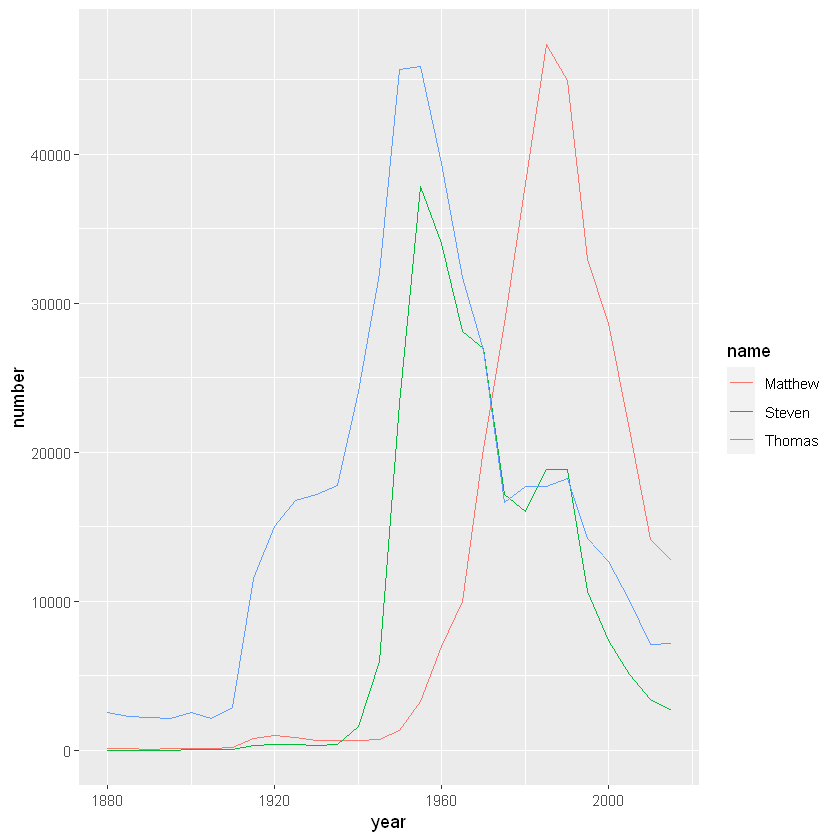

In [44]:
# Filter for the names Steven, Thomas, and Matthew 
selected_names <- babynames %>%
  filter(name %in% c("Steven", "Thomas", "Matthew"))

# Plot the names using a different color for each name
ggplot(selected_names, aes(x = year, y = number, color = name)) +
  geom_line()

It looks like names like Steven and Thomas were common in the 1950s, but Matthew became common more recently.

## Grouped mutates

### Finding the year each name is most common

explore which year each name was the most common.

In [47]:
# Calculate the fraction of people born each year with the same name
babynames %>%
  group_by(year) %>%
  mutate(year_total = sum(number)) %>%
  ungroup() %>%
  mutate(fraction = number / year_total) %>%
# Find the year each name is most common
  group_by(name) %>%
  top_n(1, fraction)

year,name,number,year_total,fraction
1880,Abbott,5,201478,2.481661e-05
1880,Abe,50,201478,2.481661e-04
1880,Abner,27,201478,1.340097e-04
1880,Adelbert,28,201478,1.389730e-04
1880,Adella,26,201478,1.290463e-04
1880,Adolf,6,201478,2.977993e-05
1880,Adolph,93,201478,4.615889e-04
1880,Agustus,5,201478,2.481661e-05
1880,Albert,1493,201478,7.410238e-03
1880,Albertina,7,201478,3.474325e-05


Notice that the results are grouped by `year`, then `name`, so the first few entries are names that were most popular in the 1880's that start with the letter A.

### Adding the total and maximum for each name

divide each name by the maximum for that name. This means that every name will peak at 1.

In [48]:
# Add columns name_total and name_max for each name
babynames %>%
  group_by(name)%>%
  mutate(name_total=sum(number), name_max=max(number) )%>%
  # Ungroup the table 
  ungroup()%>%
  # Add the fraction_max column containing the number by the name maximum 
  mutate(fraction_max=number/name_max)

year,name,number,name_total,name_max,fraction_max
1880,Aaron,102,114739,14635,0.0069695934
1880,Ab,5,77,31,0.1612903226
1880,Abbie,71,4330,445,0.1595505618
1880,Abbott,5,217,51,0.0980392157
1880,Abby,6,11272,1753,0.0034227039
1880,Abe,50,1832,271,0.1845018450
1880,Abel,9,10565,3245,0.0027734977
1880,Abigail,12,72600,15762,0.0007613247
1880,Abner,27,1552,199,0.1356783920
1880,Abraham,81,17882,2449,0.0330747244


### Visualizing the normalized change in popularity

We picked a few names and calculated each of them as a fraction of their peak. This is a type of "normalizing" a name, where we're focused on the relative change within each name rather than the overall popularity of the name. We'll visualize the normalized popularity of each name. 

In [49]:
names_normalized <- babynames %>%
                     group_by(name) %>%
                     mutate(name_total = sum(number),
                            name_max = max(number)) %>%
                     ungroup() %>%
                     mutate(fraction_max = number / name_max)

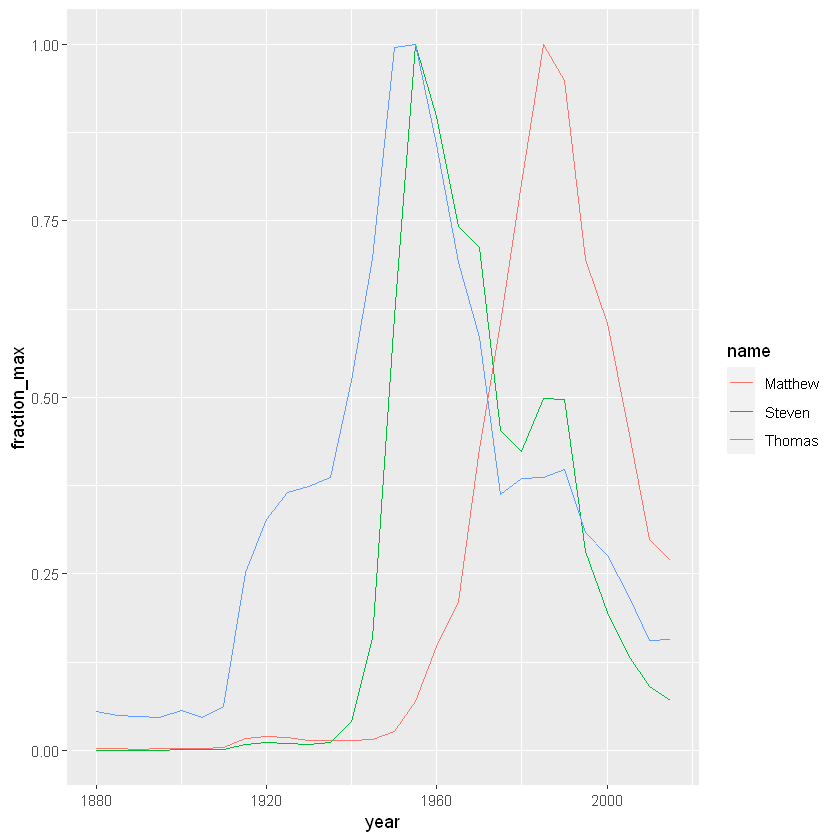

In [50]:
# Filter for the names Steven, Thomas, and Matthew
names_filtered <- names_normalized %>%
  filter(name %in% c("Steven", "Thomas", "Matthew"))

# Visualize these names over time
names_filtered %>%
  ggplot(aes(x=year, y=fraction_max, color=name))+
    geom_line()

As you can see, the line for each name hits a peak at 1, although the peak year differs for each name.

## Window functions

### Using ratios to describe the frequency of a name

What if instead of finding the difference, you wanted to find the ratio?

In [51]:
babynames_fraction <- babynames %>%
    group_by(year) %>%
        mutate(year_total = sum(number)) %>%
    ungroup() %>%
        mutate(fraction = number / year_total)

In [52]:
babynames_fraction %>%
  # Arrange the data in order of name, then year 
  arrange(name, year) %>%
  # Group the data by name
  group_by(name) %>%
  # Add a ratio column that contains the ratio between each year 
  mutate(ratio = fraction/lag(fraction))

year,name,number,year_total,fraction,ratio
2010,Aaban,9,3672066,2.450936e-06,NA
2015,Aaban,15,3648781,4.110962e-06,1.6773026
1995,Aadam,6,3652750,1.642598e-06,NA
2000,Aadam,6,3767293,1.592656e-06,0.9695954
2005,Aadam,6,3828460,1.567210e-06,0.9840231
2010,Aadam,7,3672066,1.906284e-06,1.2163552
2015,Aadam,22,3648781,6.029411e-06,3.1629135
2010,Aadan,11,3672066,2.995589e-06,NA
2015,Aadan,10,3648781,2.740641e-06,0.9148923
2000,Aadarsh,5,3767293,1.327213e-06,NA


Notice that the first observation for each name is missing a ratio, since there is no previous year.

### Biggest jumps in a name

Previously, we added a `ratio` column to describe the ratio of the frequency of a baby name between consecutive years to describe the changes in the popularity of a name. Now, we'll look at a subset of that data, called `babynames_ratios_filtered`, to look further into the names that experienced the biggest jumps in popularity in consecutive years.

In [53]:
babynames_ratios_filtered <- babynames_fraction %>%
                     arrange(name, year) %>%
                     group_by(name) %>%
                     mutate(ratio = fraction / lag(fraction)) %>%
                     filter(fraction >= 0.00001)

In [54]:
babynames_ratios_filtered %>%
  # Extract the largest ratio from each name 
  top_n(1, ratio) %>%
  # Sort the ratio column in descending order 
  arrange(desc(ratio)) %>%
  # Filter for fractions greater than or equal to 0.001
  filter(fraction>=0.001)

year,name,number,year_total,fraction,ratio
1960,Tammy,14365,4152075,0.003459716,70.115005
2005,Nevaeh,4610,3828460,0.001204140,45.821681
1940,Brenda,5460,2301630,0.002372232,37.533147
1885,Grover,774,240822,0.003213992,35.974928
1945,Cheryl,8170,2652029,0.003080660,24.879087
1955,Lori,4980,4012691,0.001241062,23.245643
2010,Khloe,5411,3672066,0.001473557,23.215866
1950,Debra,6189,3502592,0.001766977,22.638042
2010,Bentley,4001,3672066,0.001089577,22.426900
1935,Marlene,4840,2088487,0.002317467,16.827030


Some of these can be interpreted: for example, Grover Cleveland was a president elected in 1884.